In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv("/content/drive/MyDrive/data_multi_pchip.csv")

In [21]:
data

,Pixel_ID,Timestep,Rainfall,Temperature,NDVI_1,NDVI_2,NDVI_3,NDVI_4,NDVI_5,NDVI_6,...,DEM_91,DEM_92,DEM_93,DEM_94,DEM_95,DEM_96,DEM_97,DEM_98,DEM_99,DEM_100
0,0,1,6.2,17.0,0.256965,0.297766,0.441888,0.443540,0.466343,0.284104,...,216.297760,215.630520,216.383970,217.231120,218.080150,219.270300,220.767820,221.613100,222.28970,221.652470
1,0,2,3.2,17.6,0.282991,0.281068,0.329591,0.430013,0.461121,0.413675,...,216.297760,215.630520,216.383970,217.231120,218.080150,219.270300,220.767820,221.613100,222.28970,221.652470
2,0,3,0.4,16.8,0.321375,0.291556,0.313549,0.428081,0.465905,0.510159,...,216.297760,215.630520,216.383970,217.231120,218.080150,219.270300,220.767820,221.613100,222.28970,221.652470
3,0,4,5.2,10.6,0.370742,0.351911,0.425277,0.550242,0.670167,0.548899,...,216.297760,215.630520,216.383970,217.231120,218.080150,219.270300,220.767820,221.613100,222.28970,221.652470
4,0,5,4.0,13.6,0.394024,0.354304,0.418188,0.555165,0.638745,0.554536,...,216.297760,215.630520,216.383970,217.231120,218.080150,219.270300,220.767820,221.613100,222.28970,221.652470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621385,23815,26,1.2,10.2,0.668898,0.689288,0.703376,0.713263,0.727888,0.758736,...,12.125322,12.003448,11.800076,11.410529,12.374304,13.293218,15.009918,17.294865,19.76524,21.390722
621386,23815,27,2.4,4.0,0.627192,0.673908,0.689800,0.701431,0.725349,0.757375,...,12.125322,12.003448,11.800076,11.410529,12.374304,13.293218,15.009918,17.294865,19.76524,21.390722
621387,23815,28,0.2,-1.6,0.564976,0.650965,0.669547,0.683782,0.721561,0.755345,...,12.125322,12.003448,11.800076,11.410529,12.374304,13.293218,15.009918,17.294865,19.76524,21.390722
621388,23815,29,1.6,1.2,0.478147,0.618946,0.641281,0.659149,0.716275,0.752512,...,12.125322,12.003448,11.800076,11.410529,12.374304,13.293218,15.009918,17.294865,19.76524,21.390722


# 1. Split and normalize the data

In [22]:
# Select columns to rename
dem_columns = [f'DEM {i}' for i in range(1, 101)]

# Rename columns
new_dem_columns = [f'DEM_{i}' for i in range(1, 101)]
data = data.rename(columns=dict(zip(dem_columns, new_dem_columns)))


In [ ]:

# Repeat 'Rainfall' and 'Temperature' across 100 new columns
for i in range(1, 101):
    data[f'Rainfall_{i}'] = data['Rainfall']

for i in range(1, 101):
    data[f'Temperature_{i}'] = data['Temperature']

# Delete the original 'Rainfall' and 'Temperature' columns
data = data.drop(columns=['Rainfall', 'Temperature'])


In [24]:
# Split the data

pixel_ids = data['Pixel_ID'].unique()

# Randomly shuffle the pixel_ids
np.random.shuffle(pixel_ids)

split_idx_1 = int(0.7 * len(pixel_ids))
split_idx_2 = int(0.9 * len(pixel_ids))  # Adjusted for 70% training, 20% validation, 10% test split

train_pixel_ids = pixel_ids[:split_idx_1]
val_pixel_ids = pixel_ids[split_idx_1:split_idx_2]
test_pixel_ids = pixel_ids[split_idx_2:]

train_data = data.loc[data['Pixel_ID'].isin(train_pixel_ids)]
val_data = data.loc[data['Pixel_ID'].isin(val_pixel_ids)]
test_data = data.loc[data['Pixel_ID'].isin(test_pixel_ids)]

In [ ]:
# from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scale temperature, rainfall, NDVI, and DEM variables
temp_scalers = [MinMaxScaler() for _ in range(100)]
rain_scalers = [MinMaxScaler() for _ in range(100)]
ndvi_scalers = [MinMaxScaler() for _ in range(100)]
dem_scalers = [MinMaxScaler() for _ in range(100)]  # Assuming there are 100 DEM features

for i in range(1, 101):
    train_data[f'Temperature_{i}_scaled'] = temp_scalers[i - 1].fit_transform(train_data[f'Temperature_{i}'].values.reshape(-1, 1))
    train_data[f'Rainfall_{i}_scaled'] = rain_scalers[i - 1].fit_transform(train_data[f'Rainfall_{i}'].values.reshape(-1, 1))
    train_data[f'NDVI_{i}_scaled'] = ndvi_scalers[i - 1].fit_transform(train_data[f'NDVI_{i}'].values.reshape(-1, 1))
    train_data[f'DEM_{i}_scaled'] = dem_scalers[i - 1].fit_transform(train_data[f'DEM_{i}'].values.reshape(-1, 1))

    # Apply the scaler fitted on the training data to the validation and test data
    val_data[f'Temperature_{i}_scaled'] = temp_scalers[i - 1].transform(val_data[f'Temperature_{i}'].values.reshape(-1, 1))
    val_data[f'Rainfall_{i}_scaled'] = rain_scalers[i - 1].transform(val_data[f'Rainfall_{i}'].values.reshape(-1, 1))
    val_data[f'NDVI_{i}_scaled'] = ndvi_scalers[i - 1].transform(val_data[f'NDVI_{i}'].values.reshape(-1, 1))
    val_data[f'DEM_{i}_scaled'] = dem_scalers[i - 1].transform(val_data[f'DEM_{i}'].values.reshape(-1, 1))

    test_data[f'Temperature_{i}_scaled'] = temp_scalers[i - 1].transform(test_data[f'Temperature_{i}'].values.reshape(-1, 1))
    test_data[f'Rainfall_{i}_scaled'] = rain_scalers[i - 1].transform(test_data[f'Rainfall_{i}'].values.reshape(-1, 1))
    test_data[f'NDVI_{i}_scaled'] = ndvi_scalers[i - 1].transform(test_data[f'NDVI_{i}'].values.reshape(-1, 1))
    test_data[f'DEM_{i}_scaled'] = dem_scalers[i - 1].transform(test_data[f'DEM_{i}'].values.reshape(-1, 1))
 

In [26]:
import re

# Define the regular expression pattern
pattern = re.compile(r'^(Rainfall|Temperature|NDVI|DEM)_[0-9]+(?<!_scaled)$')

# Get the columns to drop for each dataset
cols_to_drop_train = [col for col in train_data.columns if pattern.search(col)]
cols_to_drop_val = [col for col in val_data.columns if pattern.search(col)]
cols_to_drop_test = [col for col in test_data.columns if pattern.search(col)]

# Drop the columns from each dataframe
train_scaled = train_data.drop(cols_to_drop_train, axis=1)
val_scaled = val_data.drop(cols_to_drop_val, axis=1)
test_scaled = test_data.drop(cols_to_drop_test, axis=1)


In [ ]:
train_scaled

In [ ]:
train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pixel_ID,434940.0,11640.920817,6955.488523,1.0,5641.000000,11489.000000,17561.000000,23815.0
Timestep,434940.0,15.500000,8.655451,1.0,8.000000,15.500000,23.000000,30.0
Temperature_1_scaled,434940.0,0.635339,0.132946,0.0,0.530172,0.637931,0.741379,1.0
Rainfall_1_scaled,434940.0,0.020448,0.035951,0.0,0.000000,0.000000,0.027523,1.0
NDVI_1_scaled,434940.0,0.771040,0.118726,0.0,0.675879,0.785105,0.871359,1.0
...,...,...,...,...,...,...,...,...
DEM_99_scaled,434940.0,0.153635,0.131471,0.0,0.059474,0.112771,0.196092,1.0
Temperature_100_scaled,434940.0,0.635339,0.132946,0.0,0.530172,0.637931,0.741379,1.0
Rainfall_100_scaled,434940.0,0.020448,0.035951,0.0,0.000000,0.000000,0.027523,1.0
NDVI_100_scaled,434940.0,0.771328,0.118828,0.0,0.675792,0.785734,0.871880,1.0


In [27]:
# Check for NaN values in the scaled input features
has_nan = train_scaled.isna().any().any()
print("NaN values in the scaled input features:", has_nan)

NaN values in the scaled input features: False


# 2. Build data structure for train the model

In [39]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import backend as K
import joblib
from keras.models import load_model
import time

In [29]:
# Select input and output variables
input_vars = [f'NDVI_{i}_scaled' for i in range(1, 101)] + [f'Rainfall_{i}_scaled' for i in range(1, 101)] + [f'Temperature_{i}_scaled' for i in range(1, 101)] + [f'DEM_{i}_scaled' for i in range(1, 101)]
output_vars = [f'NDVI_{i}_scaled' for i in range(1, 101)]

# Define window size for input sequences
window_size = 20

# Create sequences of input and output for training data
X_train = []
y_train = []
for pixel_id in train_scaled['Pixel_ID'].unique():
    pixel_data = train_scaled[train_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_train.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_train.append(pixel_data.loc[i, output_vars].values)

# Create sequences of input and output for validation data
X_val = []
y_val = []
for pixel_id in val_scaled['Pixel_ID'].unique():
    pixel_data = val_scaled[val_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_val.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_val.append(pixel_data.loc[i, output_vars].values)

# Create sequences of input and output for testing data
X_test = []
y_test = []
for pixel_id in test_scaled['Pixel_ID'].unique():
    pixel_data = test_scaled[test_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_test.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_test.append(pixel_data.loc[i, output_vars].values)


In [30]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
train_data

In [ ]:
# X_test_multi_reshaped = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))
# X_test_multi_reshaped.shape

(20520, 80)

## 2.0 prepare data for convLSTM and transformer model

In [31]:
# Convert lists to numpy arrays
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
X_val = np.array(X_val).astype('float32')
y_val = np.array(y_val).astype('float32')
X_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')


In [32]:
# Determine the dimensions of the input data
samples_train = X_train.shape[0]
samples_val = X_val.shape[0]
samples_test = X_test.shape[0]
time = X_train.shape[1]
channels = X_train.shape[2]

# Reshape the input data to be suitable for ConvLSTM
X_train = X_train.reshape((samples_train, time, 10, 10, 4))  # 4 for NDVI, DEM, Rainfall, and Temperature
X_val = X_val.reshape((samples_val, time, 10, 10, 4))
X_test = X_test.reshape((samples_test, time, 10, 10, 4))

In [33]:
# # Reshape y_train, y_val, and y_test
y_train = tf.reshape(y_train, (-1, 10, 10, 1))
y_val = tf.reshape(y_val, (-1, 10, 10, 1))
y_test = tf.reshape(y_test, (-1, 10, 10, 1)) 

In [34]:
print("X_train shape:", np.shape(X_train))
print("X_val shape:", np.shape(X_val))
print("X_test shape:", np.shape(X_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

X_train shape: (144990, 20, 10, 10, 4)
X_val shape: (41420, 20, 10, 10, 4)
X_test shape: (20720, 20, 10, 10, 4)
y_train shape: (144990, 10, 10, 1)
y_val shape: (41420, 10, 10, 1)
y_test shape: (20720, 10, 10, 1)


## 2.3 convLSTM

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Dense, Flatten

# Define height, width, and number of channels
height = 10
width = 10
num_channels = 4

num_outputs = 1

# Assume a learning rate
learning_rate = 0.001

# Define the model architecture
with tf.device('/GPU:0'):
    convlstm_model = Sequential()
    convlstm_model.add(ConvLSTM2D(filters=128, kernel_size=(3, 3), activation='relu', 
                                  input_shape=(window_size, height, width, num_channels), 
                                  padding='same', return_sequences=True))
    convlstm_model.add(BatchNormalization())
    convlstm_model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', 
                                  padding='same', return_sequences=False))
    convlstm_model.add(BatchNormalization())
    #convlstm_model.add(Flatten())
    convlstm_model.add(Dense(32, activation='relu'))
    convlstm_model.add(BatchNormalization())
    convlstm_model.add(Dense(num_outputs, activation='linear'))

    loss_fn = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    convlstm_model.compile(loss=loss_fn, optimizer=optimizer)

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    convlstm_model.summary()

    start_time_convlstm = time.time()
    convlstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128,callbacks=[early_stop])
    
    end_time_convlstm = time.time()

    print("Training took: ", end_time_convlstm - start_time_convlstm, " seconds")


In [ ]:
convlstm_pred_train = convlstm_model.predict(X_train)
convlstm_pred_val = convlstm_model.predict(X_val)
convlstm_pred_test = convlstm_model.predict(X_test)

648/648 [==============================] - 16s 25ms/step


In [ ]:
# Check the shapes of y_true and y_pred
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)
print(np.array(convlstm_pred_train).shape)
print(np.array(convlstm_pred_val).shape)
print(np.array(convlstm_pred_test).shape)
print(X_train.shape)

(144980, 10, 10, 1)
(41420, 10, 10, 1)
(20720, 10, 10, 1)
(144980, 10, 10, 1)
(41420, 10, 10, 1)
(20720, 10, 10, 1)
(144980, 20, 10, 10, 4)


In [ ]:
# Flatten the predictions
convlstm_pred_test = convlstm_pred_test.reshape(convlstm_pred_test.shape[0], -1)
convlstm_pred_val = convlstm_pred_val.reshape(convlstm_pred_val.shape[0], -1)
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], -1))

print(np.array(convlstm_pred_test).shape)
print(np.array(y_test_reshaped).shape)

(20720, 100)
(20720, 100)


In [ ]:
# Now compute MSE
convlstm_mse = mean_squared_error(y_test_reshaped, convlstm_pred_test)
print("convLSTM Mean Squared Error:", convlstm_mse)

convLSTM Mean Squared Error: 0.00248063


In [ ]:
# save model
convlstm_model.save("/content/drive/MyDrive/Saved_models/convlstm_model_multi")

In [ ]:
# Load convlstm model
convlstm_model = load_model("/content/drive/MyDrive/Saved_models/convlstm_model_multi")

## 2.4 Transformer

In [ ]:
pip install tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, TimeDistributed
from tensorflow.keras.layers import Conv1D, Conv2D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D, AveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import layers, Model


In [47]:
# Positional encoding for the transformer model

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates

# Scaled dot product attention
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

# Multi-head attention
class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)
        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
        return output, attention_weights

# Transformer Encoder Layer
class TransformerEncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
            layers.Dense(dff, activation='relu'),
            
            layers.Dense(d_model)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

# Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_shape, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = layers.Dense(self.d_model, activation='linear')
        self.pos_encoding = positional_encoding(input_shape[0], self.d_model)
        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
        return x

def create_simplified_transformer_model(input_shape, num_layers, d_model, num_heads, dff, rate=0.1):
    inputs = layers.Input(shape=input_shape)
    conv2d = layers.TimeDistributed(layers.Conv2D(128, (3,3), activation='relu'))(inputs)
    reshaped = layers.Reshape((input_shape[0], -1))(conv2d)
    mask = None
    x = TransformerEncoder(num_layers, d_model, num_heads, dff, (input_shape[0], reshaped.shape[-1]), rate)(reshaped, training=None, mask=mask)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(10*10, activation='linear')(x) # Output layer now has size 10*10
    x = layers.Reshape((10, 10, 1))(x) # Reshape to match your y_true shape
    x = layers.Dense(1)(x) # Add another dense layer
    outputs = layers.Reshape((10, 10, 1))(x) # Reshape to match your y_true shape
    model = Model(inputs=inputs, outputs=outputs)
    return model


input_shape = (20, 10, 10, 4)
num_layers = 2
d_model = 64
num_heads = 2
dff = 128
dropout_rate = 0.1

transformer_model = create_simplified_transformer_model(input_shape, num_layers, d_model, num_heads, dff, dropout_rate)
transformer_model.summary()

transformer_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Start recording training time
start_time_transformer = time.time()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20, 10, 10, 4)]   0         
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 8, 8, 128)    4736      
 tributed)                                                       
                                                                 
 reshape_12 (Reshape)        (None, 20, 8192)          0         
                                                                 
 transformer_encoder_4 (Tran  (None, 20, 64)           591296    
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                           

In [48]:
history = transformer_model.fit(X_train, y_train, epochs=100, batch_size=64,validation_data=(X_val, y_val),callbacks=[early_stop])


Epoch 1/100
2266/2266 [==============================] - 42s 15ms/step - loss: 0.0937 - mae: 0.2137 - val_loss: 0.0087 - val_mae: 0.0602
Epoch 2/100
2266/2266 [==============================] - 33s 14ms/step - loss: 0.0125 - mae: 0.0864 - val_loss: 0.0068 - val_mae: 0.0471
Epoch 3/100
2266/2266 [==============================] - 33s 15ms/step - loss: 0.0069 - mae: 0.0634 - val_loss: 0.0060 - val_mae: 0.0412
Epoch 4/100
2266/2266 [==============================] - 33s 15ms/step - loss: 0.0046 - mae: 0.0510 - val_loss: 0.0055 - val_mae: 0.0363
Epoch 5/100
2266/2266 [==============================] - 33s 15ms/step - loss: 0.0037 - mae: 0.0441 - val_loss: 0.0056 - val_mae: 0.0364
Epoch 6/100
2266/2266 [==============================] - 33s 15ms/step - loss: 0.0032 - mae: 0.0405 - val_loss: 0.0054 - val_mae: 0.0343
Epoch 7/100
2266/2266 [==============================] - 33s 15ms/step - loss: 0.0029 - mae: 0.0383 - val_loss: 0.0052 - val_mae: 0.0319
Epoch 8/100
2266/2266 [==================

In [49]:
# Calculate the training time
training_time_transformer = time.time() - start_time_transformer
print("Training time: ", training_time_transformer, "seconds")

Training time:  1276.7319560050964 seconds


In [50]:
transformer_pred_train = transformer_model.predict(X_train)
transformer_pred_val = transformer_model.predict(X_val)
transformer_pred_test = transformer_model.predict(X_test)

648/648 [==============================] - 3s 5ms/step


In [51]:
# Flatten the predictions
transformer_pred_test = transformer_pred_test.reshape(transformer_pred_test.shape[0], -1)
transformer_pred_val = transformer_pred_val.reshape(transformer_pred_val.shape[0], -1)
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], -1))

In [52]:
print(np.array(transformer_pred_test).shape)
print(np.array(y_test_reshaped).shape)

(20720, 100)
(20720, 100)


In [53]:
# Evaluate the model on the test set
transformer_mse = mean_squared_error(y_test_reshaped, transformer_pred_test)
print("Transformer Mean Squared Error:", transformer_mse)

Transformer Mean Squared Error: 0.0019862647


In [54]:
# save model
transformer_model.save("/content/drive/MyDrive/Saved_models/transformer_model_multi")

In [ ]:
# Load transformer model
transformer_model = load_model("/content/drive/MyDrive/Saved_models/transformer_model_multi")

# 3. Compare the model performance

In [ ]:
# Load models

convlstm_model = load_model("/content/drive/MyDrive/Saved_models/convlstm_model_multi")
transformer_model = load_model("/content/drive/MyDrive/Saved_models/transformer_model_multi")

In [ ]:
y_val_reshaped = np.reshape(y_val, (y_val.shape[0], -1))
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], -1))

print(np.array(y_val_reshaped).shape)
print(np.array(y_test_reshaped).shape)

(41420, 100)
(20720, 100)


In [ ]:
# Assuming y_test_reshaped is of shape (num_samples, 100)
inverse_y_test = np.zeros_like(y_test_reshaped)

for i in range(100):
    # Inverse transform the true NDVI values for the test set at each timestep
    inverse_y_test[:, i] = ndvi_scalers[i].inverse_transform(y_test_reshaped[:, i].reshape(-1, 1)).flatten()

inverse_y_val = np.zeros_like(y_val_reshaped)

for i in range(100):
    # Inverse transform the true NDVI values for the test set at each timestep
    inverse_y_val[:, i] = ndvi_scalers[i].inverse_transform(y_val_reshaped[:, i].reshape(-1, 1)).flatten()


In [ ]:
# Assuming convlstm_pred_test and transformer_pred_test are of shape (num_samples, 100)
inverse_convlstm_pred_test = np.zeros_like(convlstm_pred_test)
inverse_transformer_pred_test = np.zeros_like(transformer_pred_test)

for i in range(100):
    # Inverse transform the ConvLSTM predicted NDVI values for the test set at each timestep
    inverse_convlstm_pred_test[:, i] = ndvi_scalers[i].inverse_transform(convlstm_pred_test[:, i].reshape(-1, 1)).flatten()

    # Inverse transform the Transformer predicted NDVI values for the test set at each timestep
    inverse_transformer_pred_test[:, i] = ndvi_scalers[i].inverse_transform(transformer_pred_test[:, i].reshape(-1, 1)).flatten()

inverse_convlstm_pred_val = np.zeros_like(convlstm_pred_val)
inverse_transformer_pred_val = np.zeros_like(transformer_pred_val)

for i in range(100):

    # Inverse transform the ConvLSTM predicted NDVI values for the validation set at each timestep
    inverse_convlstm_pred_val[:, i] = ndvi_scalers[i].inverse_transform(convlstm_pred_val[:, i].reshape(-1, 1)).flatten()

    # Inverse transform the Transformer predicted NDVI values for the validation set at each timestep
    inverse_transformer_pred_val[:, i] = ndvi_scalers[i].inverse_transform(transformer_pred_val[:, i].reshape(-1, 1)).flatten()



In [ ]:
print(np.array(inverse_y_test).shape)
print(np.array(inverse_y_val).shape)
print(np.array(inverse_convlstm_pred_val).shape)
print(np.array(inverse_convlstm_pred_test).shape)

(20520, 100)
(41020, 100)
(41020, 100)
(20520, 100)


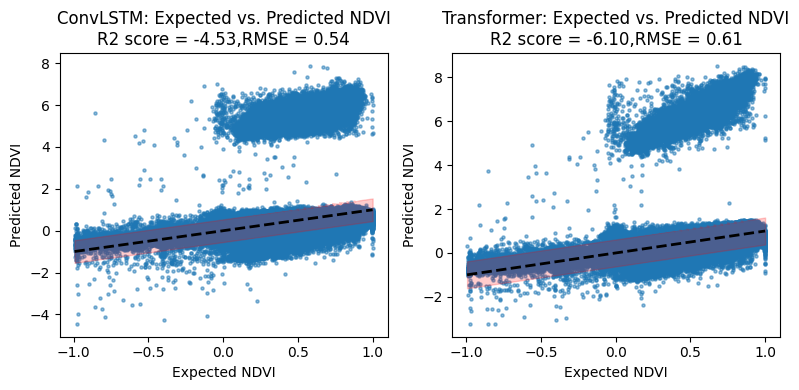

In [ ]:
mse_convlstm_val = mean_squared_error(inverse_y_val, inverse_convlstm_pred_val)
mse_transformer_val = mean_squared_error(inverse_y_val, inverse_transformer_pred_val)

mse_convlstm_test = mean_squared_error(inverse_y_test, inverse_convlstm_pred_test)
mse_transformer_test = mean_squared_error(inverse_y_test, inverse_transformer_pred_test)

r2_convlstm_test = r2_score(inverse_y_test, inverse_convlstm_pred_test)
r2_transformer_test = r2_score(inverse_y_test, inverse_transformer_pred_test)

rmse_convlstm_test = np.sqrt(mean_squared_error(inverse_y_test, inverse_convlstm_pred_test))
rmse_transformer_test = np.sqrt(mean_squared_error(inverse_y_test, inverse_transformer_pred_test))

# Create a 2x2 grid of subplots for the 4 different models
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Set titles and labels
titles = ['ConvLSTM', 'Transformer']
predictions = [inverse_convlstm_pred_test, inverse_transformer_pred_test]
r2_scores = [r2_convlstm_test, r2_transformer_test]
rmse_scores = [rmse_convlstm_test, rmse_transformer_test]

for idx, ax in enumerate(axes.flatten()):
    ax.scatter(inverse_y_test, predictions[idx], s=5, alpha=0.5)
    
    # One-to-one line
    min_val = np.min(inverse_y_test)
    max_val = np.max(inverse_y_test)
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
    
    # Deviation line
    deviation = np.std(inverse_y_test - predictions[idx])
    ax.fill_between(np.sort(inverse_y_test.flatten()), np.sort(inverse_y_test.flatten()) - deviation, np.sort(inverse_y_test.flatten()) + deviation, alpha=0.2, color='r')
    
    ax.set_xlabel('Expected NDVI')
    ax.set_ylabel('Predicted NDVI')
    ax.set_title(f'{titles[idx]}: Expected vs. Predicted NDVI\nR2 score = {r2_scores[idx]:.2f},RMSE = {rmse_scores[idx]:.2f}')

plt.tight_layout()
plt.show()



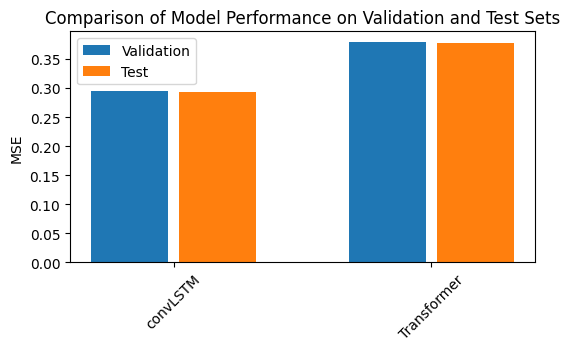

In [ ]:
# Compare the Mean Squared Error (MSE) for models

# Plot bar chart
plt.figure(figsize=(6, 3))
x = np.arange(2)
width = 0.3

plt.bar(x - 0.17, [mse_convlstm_val, mse_transformer_val], width, label='Validation')
plt.bar(x + 0.17, [mse_convlstm_test, mse_transformer_test], width, label='Test')
plt.xticks(ticks=x, labels=['convLSTM', 'Transformer'],
           rotation=45)
plt.ylabel('MSE')
plt.title('Comparison of Model Performance on Validation and Test Sets')
_ = plt.legend()
plt.show()



# 4. View the single and multiple steps prediction performance

## 4.1 Single prediction step

1/1 [==============================] - 0s 179ms/step


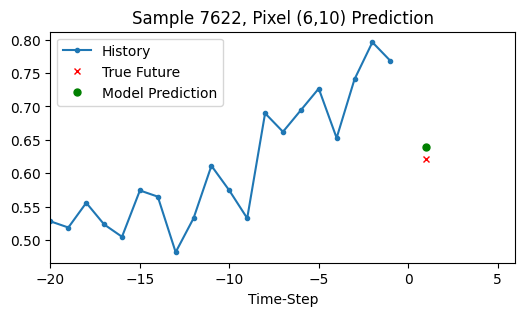

1/1 [==============================] - 0s 36ms/step


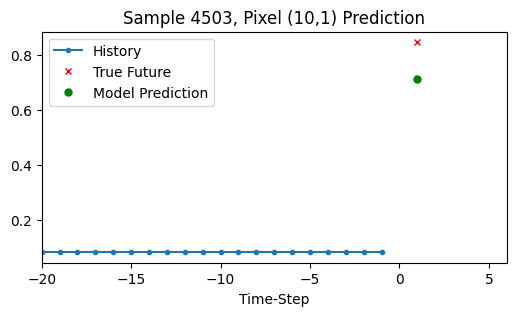

1/1 [==============================] - 0s 38ms/step


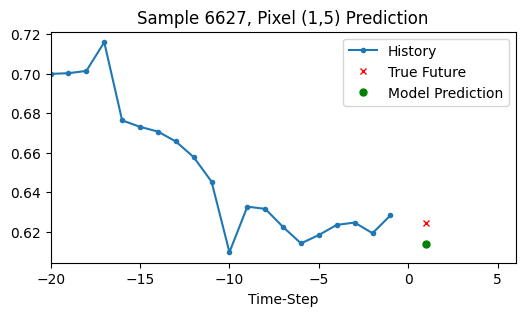

1/1 [==============================] - 0s 38ms/step


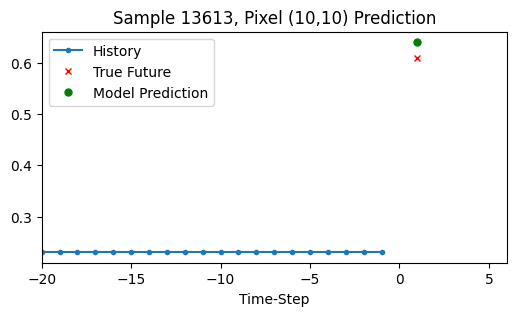

1/1 [==============================] - 0s 37ms/step


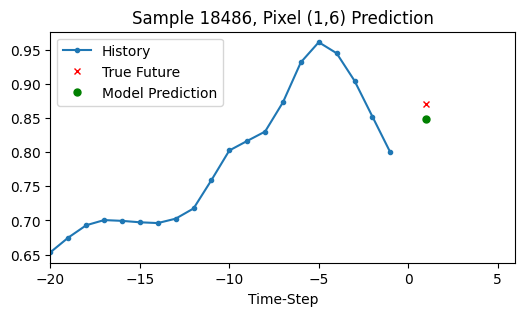

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 1

    fig, ax = plt.subplots(figsize=(6, 3))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+2)*2])
    plt.xlabel("Time-Step")
    plt.show()

n = 5  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

for idx in random_indices:
    pixel_i = np.random.randint(0, 10)  # random pixel index
    pixel_j = np.random.randint(0, 10)  # random pixel index

    x_sample = X_test[idx, :, pixel_i, pixel_j, 2]  # assuming NDVI is the 3rd feature
    y_sample = y_test[idx, pixel_i, pixel_j, 0]
    y_pred_convlstm = convlstm_model.predict(X_test[idx:idx+1])[0, pixel_i, pixel_j, 0]

    history_ndvi = x_sample  # history of NDVI values
    true_future = y_sample  # true future NDVI value
    model_prediction = y_pred_convlstm  # predicted NDVI value

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {idx+1}, Pixel ({pixel_i+1},{pixel_j+1}) Prediction")


1/1 [==============================] - 0s 21ms/step


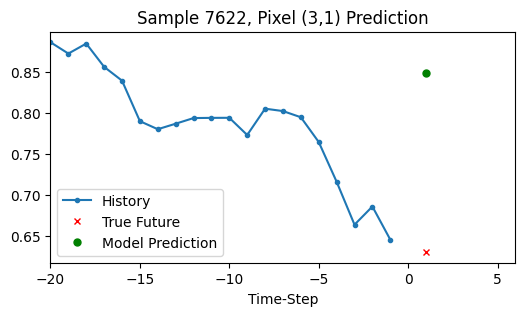

1/1 [==============================] - 0s 21ms/step


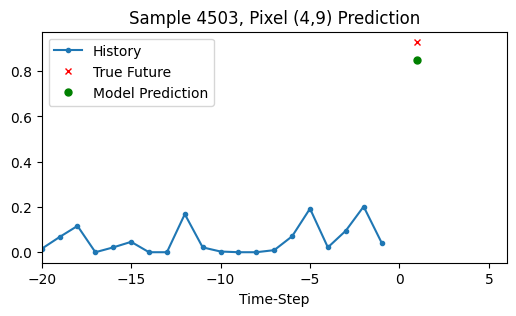

1/1 [==============================] - 0s 22ms/step


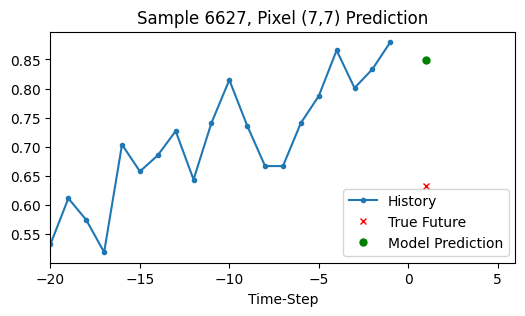

1/1 [==============================] - 0s 22ms/step


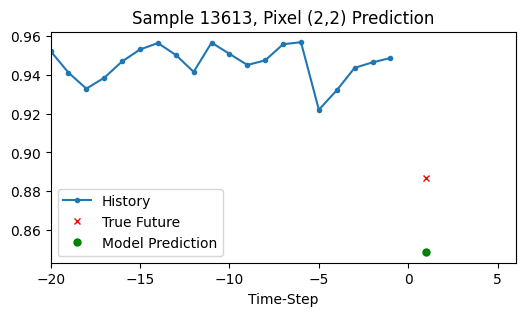

1/1 [==============================] - 0s 24ms/step


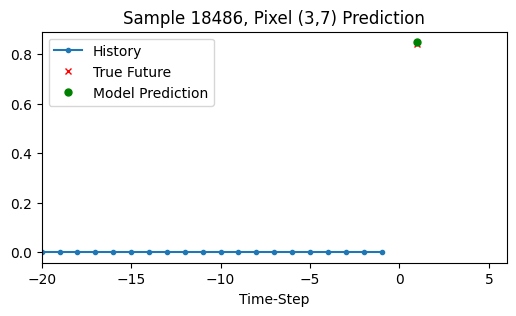

In [ ]:
# Transformer
#Single step prediction
for idx in random_indices:
    pixel_i = np.random.randint(0, 10)  # random pixel index
    pixel_j = np.random.randint(0, 10)  # random pixel index

    x_sample = X_test[idx, :, pixel_i, pixel_j, 2]  # assuming NDVI is the 3rd feature
    y_sample = y_test[idx, pixel_i, pixel_j, 0]
    y_pred_transformer = transformer_model.predict(X_test[idx:idx+1])[0, pixel_i, pixel_j, 0]

    history_ndvi = x_sample  # history of NDVI values
    true_future = y_sample  # true future NDVI value
    model_prediction = y_pred_convlstm  # predicted NDVI value

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {idx+1}, Pixel ({pixel_i+1},{pixel_j+1}) Prediction")


1/1 [==============================] - 0s 22ms/step


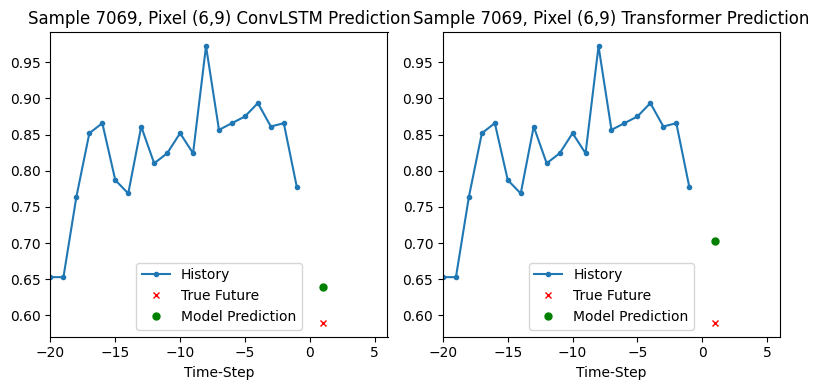

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_plot(plot_data, title, ax):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 1

    ax.set_title(title)
    for i, val in enumerate(plot_data):
        if i:
            ax.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    ax.legend()
    ax.set_xlim([time_steps[0], (future+2)*2])
    ax.set_xlabel("Time-Step")

n = 1  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for idx in random_indices:
    pixel_i = np.random.randint(0, 10)  # random pixel index
    pixel_j = np.random.randint(0, 10)  # random pixel index

    x_sample = X_test[idx, :, pixel_i, pixel_j, 2]  # assuming NDVI is the 3rd feature
    y_sample = y_test[idx, pixel_i, pixel_j, 0]
    
    history_ndvi = x_sample  # history of NDVI values
    true_future = y_sample  # true future NDVI value

    # ConvLSTM
    y_pred_convlstm = convlstm_model.predict(X_test[idx:idx+1])[0, pixel_i, pixel_j, 0]
    show_plot([history_ndvi, true_future, y_pred_convlstm], f"Sample {idx+1}, Pixel ({pixel_i+1},{pixel_j+1}) ConvLSTM Prediction", axes[0])

    # Transformer
    y_pred_transformer = transformer_model.predict(X_test[idx:idx+1])[0, pixel_i, pixel_j, 0]
    show_plot([history_ndvi, true_future, y_pred_transformer], f"Sample {idx+1}, Pixel ({pixel_i+1},{pixel_j+1}) Transformer Prediction", axes[1])

plt.tight_layout()
plt.show()


## 4.2 Multiple prediction steps

In [ ]:
import random

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        # Reshape the input_sequence to meet model's expected input shape
        current_input_reshaped = current_input[np.newaxis, :]
        prediction = model.predict(current_input_reshaped)[0]

        # Expand dimensions of prediction to match the input sequence dimensions
        prediction_expanded = prediction[np.newaxis, :, :, :]
        
        # Concatenate along the time_steps axis (axis=1)
        current_input = np.concatenate([current_input[1:], prediction_expanded], axis=1)

        predictions.append(prediction)
    return np.array(predictions)


def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, val.flatten(), marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, val.flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 5  # Number of future steps to predict (from 21st to 30th)

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(convlstm_model, x_sample, num_future_steps)

    history_ndvi = x_sample[:, :, :, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


1/1 [==============================] - 0s 39ms/step


ValueError: ignored

In [ ]:
# Convlstm model - radomly 5 timesteps

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 5  # predicting 5 future steps

    fig, ax = plt.subplots(figsize=(6, 3))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(range(future), plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+2)*2])
    plt.xlabel("Time-Step")
    plt.show()

n = 5  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

for idx in random_indices:
    pixel_i = np.random.randint(0, 10)  # random pixel index
    pixel_j = np.random.randint(0, 10)  # random pixel index

    x_sample = X_test[idx, :, pixel_i, pixel_j, 2]  # assuming NDVI is the 3rd feature
    y_sample = y_test[idx, pixel_i, pixel_j, 0]

    # history of NDVI values
    history_ndvi = x_sample  

    # future NDVI values - initialization
    future_ndvi = np.zeros(5)
    
for i in range(5):
    x_pred_sample = np.concatenate([x_sample[i+1:], future_ndvi[:i]])  # use known and predicted NDVI for prediction

    # reshape the sample to meet the model's expected input shape: (1, time_steps, 1, 1, 1)
    x_pred_sample = x_pred_sample[np.newaxis, :, np.newaxis, np.newaxis, np.newaxis]

    y_pred_convlstm = convlstm_model.predict(x_pred_sample)[0, 0, 0, 0]
    future_ndvi[i] = y_pred_convlstm  # store the predicted NDVI for future use

    true_future = y_sample  # true future NDVI value
    model_prediction = future_ndvi  # predicted future NDVI values

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {idx+1}, Pixel ({pixel_i+1},{pixel_j+1}) Prediction")


In [ ]:
x_pred_sample.shape

(19,)

In [ ]:
# Convlstm model - radomly 5 timesteps

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input.reshape(1, -1)
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 5  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test_avg[i]
    y_sample = y_test_avg[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(rf_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")

In [ ]:
# LSTM model - radomly 10 timesteps

import random

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(lstm_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")



In [ ]:
# RFmodel - radomly 10 timesteps

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input.reshape(1, -1)
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(rf_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


In [ ]:
import random

def predict_next_steps_lstm(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_rf(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        prediction = model.predict(current_input.reshape(1, -1))[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_convlstm(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, np.newaxis, np.newaxis, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def predict_next_steps_transformer(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title, ax):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    ax.set_title(title)
    for i, val in enumerate(plot_data):
        if i:
            ax.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    ax.legend()
    ax.set_xlim([time_steps[0], future[-1] + 1])
    ax.set_xlabel("Time-Step")

# Prepare data for the plot
n = 300  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

# Randomly select 5 indices from the test set for visualization
n_visualize = 1
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds_lstm = predict_next_steps_lstm(lstm_model, x_sample, num_future_steps)
    y_preds_rf = predict_next_steps_rf(rf_model, x_sample,num_future_steps)
    y_preds_convlstm = predict_next_steps_convlstm(convlstm_model, x_sample, num_future_steps)
    y_preds_transformer = predict_next_steps_transformer(transformer_model, x_sample, num_future_steps)

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
      fig, axs = plt.subplots(2, 2, figsize=(16, 8))

      show_plot([history_ndvi, true_future, y_preds_lstm], f"Sample {i + 1} LSTM Prediction", axs[0, 0])
      show_plot([history_ndvi, true_future, y_preds_rf], f"Sample {i + 1} RF Prediction", axs[0, 1])
      show_plot([history_ndvi, true_future, y_preds_convlstm], f"Sample {i + 1} ConvLSTM Prediction", axs[1, 0])
      show_plot([history_ndvi, true_future, y_preds_transformer], f"Sample {i + 1} Transformer Prediction", axs[1, 1])

      plt.tight_layout()
      plt.show()



## 4.3 View the prediction ability of models on different prediction timesteps

In [ ]:
#Cteate 2 dataframes for the model predicted NDVI and the correlated expected NDVI value

# Convert the NumPy arrays to pandas DataFrames
df_predicted = pd.DataFrame(data=predicted_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])
df_expected = pd.DataFrame(data=expected_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])

# Add index labels for each sequence
df_predicted.index = [f"Sequence {i+1}" for i in range(n)]
df_expected.index = [f"Sequence {i+1}" for i in range(n)]

# View the DataFrames
df_predicted



In [ ]:
df_expected

In [ ]:
# To view the correlation between predicted value and expected value in 1st, 5th and 10th timesteps

# Calculate R2 values
r2_21 = r2_score(df_expected["NDVI_t21"], df_predicted["NDVI_t21"])
r2_25 = r2_score(df_expected["NDVI_t25"], df_predicted["NDVI_t25"])
r2_30 = r2_score(df_expected["NDVI_t30"], df_predicted["NDVI_t30"])

# Plot scatter plot for timestep 21st
plt.scatter(df_predicted["NDVI_t21"], df_expected["NDVI_t21"])
plt.xlabel("Predicted NDVI (21st timestep)")
plt.ylabel("True NDVI (21st timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (21st timestep)\nR2: {:.2f}".format(r2_21))
plt.show()

# Plot scatter plot for timestep 25th
plt.scatter(df_predicted["NDVI_t25"], df_expected["NDVI_t25"])
plt.xlabel("Predicted NDVI (25th timestep)")
plt.ylabel("True NDVI (25th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (25th timestep)\nR2: {:.2f}".format(r2_25))
plt.show()

# Plot scatter plot for timestep 30th
plt.scatter(df_predicted["NDVI_t30"], df_expected["NDVI_t30"])
plt.xlabel("Predicted NDVI (30th timestep)")
plt.ylabel("True NDVI (30th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (30th timestep)\nR2: {:.2f}".format(r2_30))
plt.show()


# Other models 